# Import Librarys and Setup

In [11]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

# Load Iris Dataset

In [5]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                    header=None,
                    encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [6]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
y = df.iloc[0:100, [0, 2]].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values

# Data Visualization (Specific Feature)

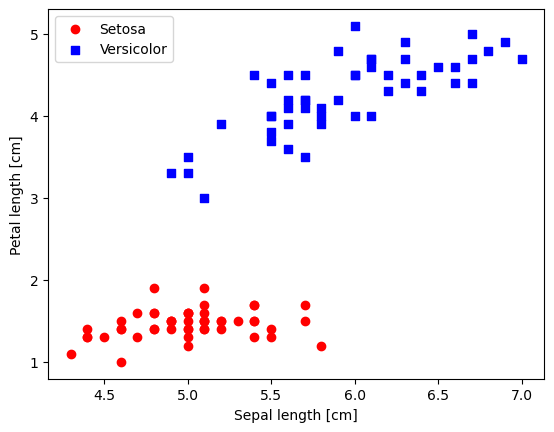

In [14]:
plt.scatter(X[:50, 0], X[:50, 1],
            color="red", marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
            color="blue", marker='s', label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

# Definition of Perceptron Algorithm

In [2]:
class Perceptron:
    """This class build the Perceptron Algorithm

    Parameters:
        eta: float
            Learning rate (between 0.0 and 1.0)
        n_iter: int
            Passes over the training dataset.
        radom_state: int
            Random number generator seed for random weight initialization.

    Attributes
        w_: 1d-array
            Weights after fitting.
        b_: Scalar
            Bias unit after fitting.
        errors_: list
            Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    

    def fit(self, X, y):
        """This function training the Perceptron Algorithm

        Args:
            X (array-like): [n_examples, n_features]. Training vectors.
            y (_type_): [n_examples]. Target values.
        Returns:
            self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """This function calculates the net input

        Args:
            X (_type_): Training data
        """
        return np.dot(X, self.w_) + self.b_
    

    def predict(self, X):
        """This fuction return the class laber after unit step

        Args:
            X (_type_): Test set
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)